(400, 64, 64)
(400,)
40


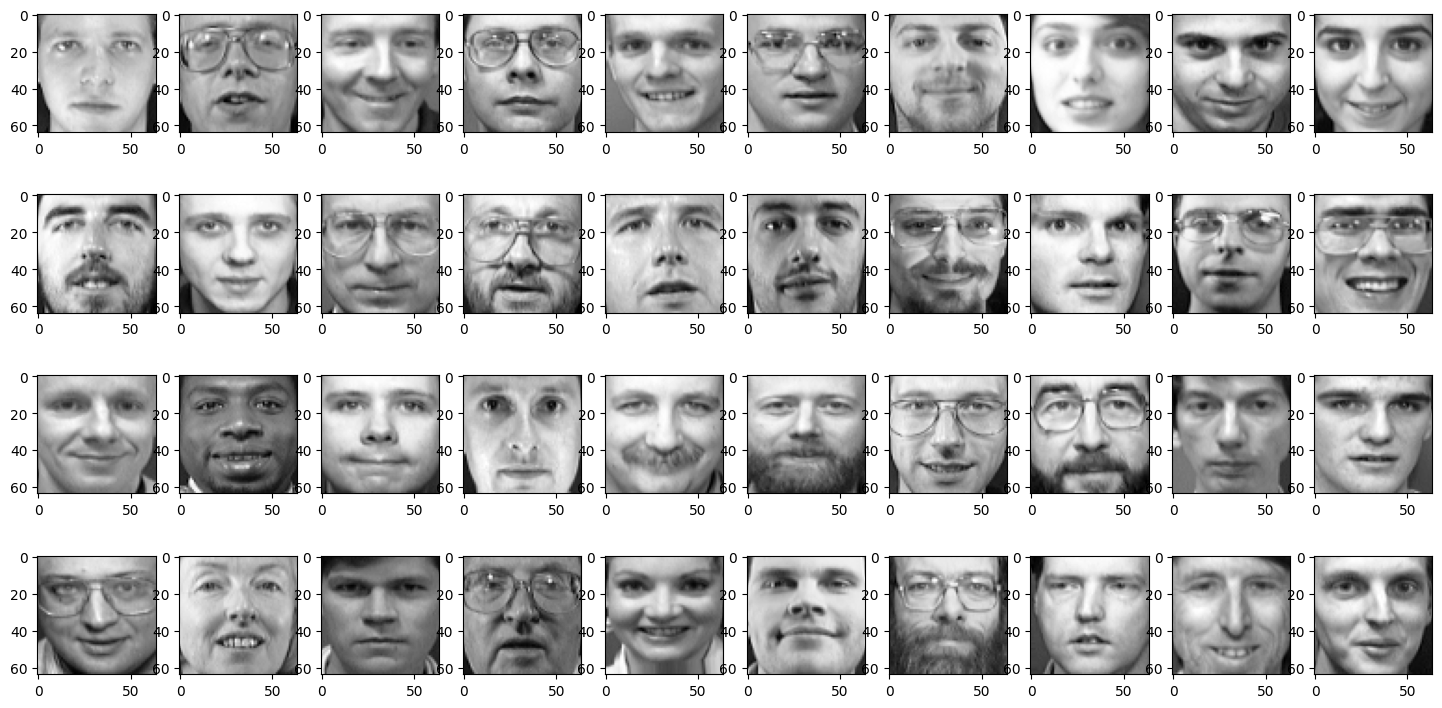

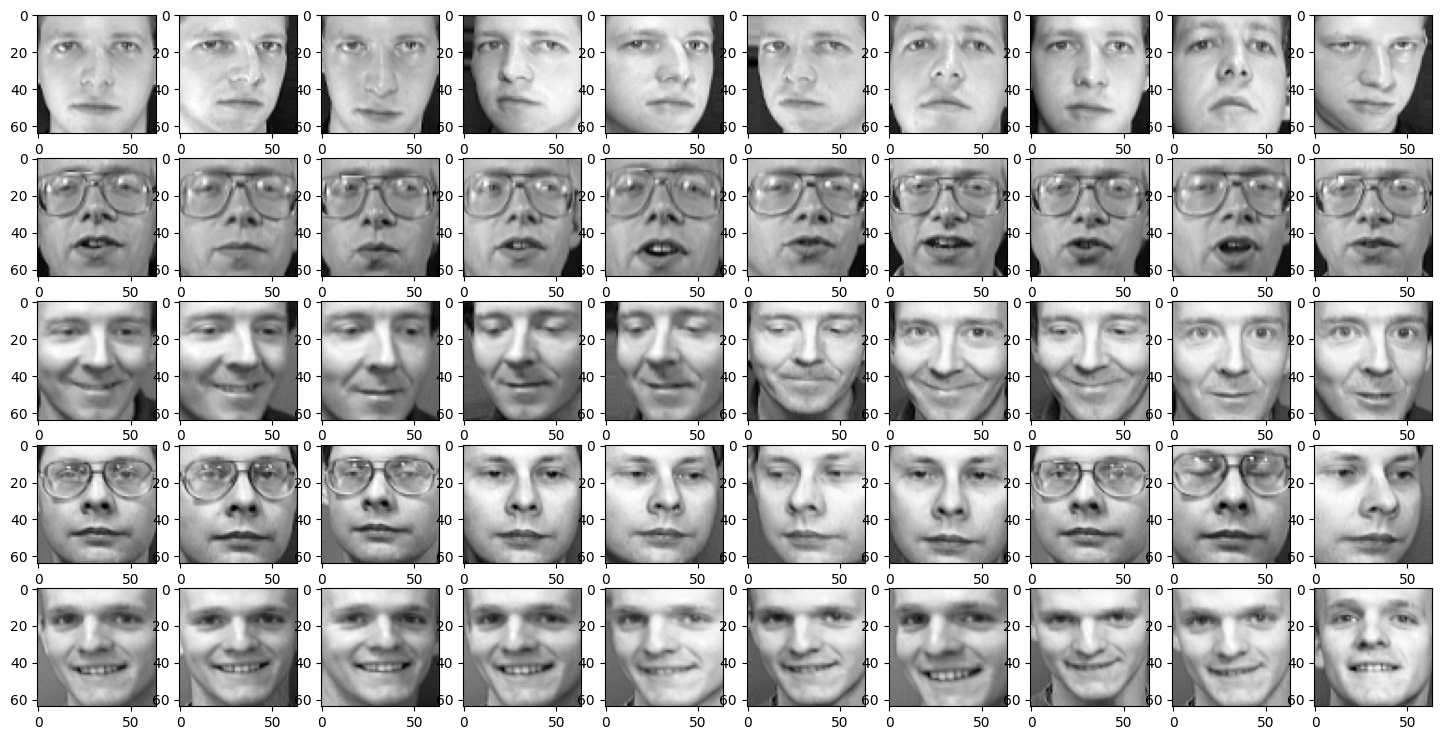

(400, 40)
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 64, 64, 8)         208       
                                                                 
 max_pooling2d_56 (MaxPooli  (None, 16, 16, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_57 (Conv2D)          (None, 16, 16, 16)        3216      
                                                                 
 max_pooling2d_57 (MaxPooli  (None, 4, 4, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_58 (Conv2D)          (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_58 (MaxPooli  (None, 2, 2, 3

In [38]:
# Standard scientific Python imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
#Load data, face images and their target i.e. perosn number
data = np.load("/kaggle/input/anndataset/olivetti_faces.npy")
target = np.load("/kaggle/input/anndataset/olivetti_faces_target.npy")

#print the size of data and target
#Data has 400 images of size 64 x 64 pixels (grayscale)
#Target has information about class of all 400 images
print(data.shape)
print(target.shape)

#Identity number of unique persons (ids) in the trarget data
#For ORL / Olivetti face dataset this there are 40 people
#The dataset contains 10 images of each person. Therefore 40 x 10 = 400 images
unique_ids=np.unique(target)
print(len(unique_ids))

#Display one sample image for each person
#Display the 40 images in 4 rows with each row having 10 images
fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
axarr = axarr.flatten()
imgs=data
for id in unique_ids:
    img_id = id * 10
    axarr[id].imshow(imgs[img_id], cmap='gray')

#Display all 10 images of first 5 people
cols = 10
subject_ids=[0, 1, 2, 3, 4]
rows = (len(subject_ids)*10)//cols
fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 9))
for i, subject_ids in enumerate(subject_ids):
    for j in range(cols):
        img_id = subject_ids*10 + j
        axarr[i, j].imshow(imgs[img_id], cmap='gray')

plt.show()


#Split the data into test and train data. Select test size = 20%
#Use sklearn library to split data into trianing and testing set
#X_train contains the image information and Y_train contains the target label (class)
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.2, random_state= 0)

#For training the data has to be split into training and validation, Split training data into training and validation set
#Set validation data size = 20% of training data
#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)

#Import keras for building the Convolutional Neural Network
#from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten



#Split the data into test and train data. Select test size = 20%
#target = np_utils.to_categorical(target, len(np.unique(target)))
target = to_categorical(target, len(np.unique(target)))

#Use sklearn library to split data into trianing and testing set
#X_train contains the image information and Y_train contains the target label (class)
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.2, random_state= 0)

#For training the data has to be split into training and validation, Split training data into training and validation set
#Set validation data size = 20% of training data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)

#target.shape
print(target.shape)
#Remember the third dimension is important for keras so specify that third dimension is 1
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)


#Define the architecture of the convolutional neural network

model = Sequential()

#Add a conv layer having 8 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(8, (5, 5), activation='relu', input_shape=(64, 64, 1), padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 16 x 16)
model.add(MaxPooling2D(pool_size=(4, 4)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 4 x 4)
model.add(MaxPooling2D(pool_size=(4, 4)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 2 x 2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
#Pass data through a softmax layer
model.add(Dense(40, activation='softmax'))
#Since there are more than 2 classes use categorical_crossentropy, adam optimization and optimize based upon accuracy value
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Print a summary of the model
model.summary()

#Train the network using the above deinfed network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)
train_accuracy = H.history['accuracy'][9]
val_accuracy = H.history['val_accuracy'][9]

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)



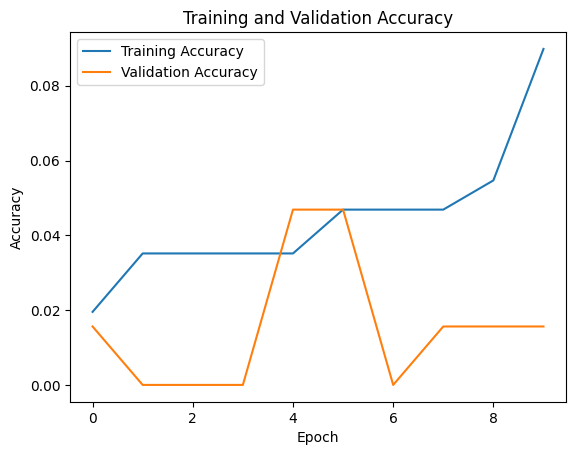

In [37]:
# Plot the difference between training and validation accuracy for each epoch
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Question 1: What is the output of the model.summary()?

1. The `model.summary()` function provides a summary of the model architecture. It includes information such as the model's name and the total number of parameters in the model.
2. The summary consists of a table-like structure that displays details for each layer in the model.
3. Each layer is listed with its type, output shape, and the number of parameters it has.
4. The output shape represents the dimensions of the layer's output tensor.
5. The parameter count indicates the total number of learnable parameters in the layer that will be updated during training.
6. The summary also shows the total number of trainable parameters in the model.
7. Additionally, it indicates whether there are any non-trainable parameters in the model.
8. The `model.summary()` output is valuable for understanding the model's architecture, complexity, and parameter distribution.



# Question 2: What the initial training accuracy and validation accuracy of the CNN?

In [8]:
initial_train_accuracy = H.history['accuracy'][0]
initial_val_accuracy = H.history['val_accuracy'][0]

print("Initial Training Accuracy:", initial_train_accuracy)
print("Initial Validation Accuracy:", initial_val_accuracy)

Initial Training Accuracy: 0.0234375
Initial Validation Accuracy: 0.0


The Convolutional Neural Network (CNN) has an initial training accuracy of 2% and an approximate validation accuracy of 0.00%.

# Question 3: How many convolutional layers and pooling layers does this network have?

The network described in the code has a total of 3 convolutional layers and 3 pooling layers.

Convolutional Layers:
1. The first convolutional layer (`Conv2D`) has 8 filters and a kernel size of (5, 5)
2. The second convolutional layer (`Conv2D`) has 16 filters and a kernel size of (5, 5)
3. The third convolutional layer (`Conv2D`) has 32 filters and a kernel size of (3, 3)


Pooling Layers:
1. The first pooling layer(`MaxPooling2D`) reduces the size of the feature maps by a factor of 4.
2. The second pooling layer(`MaxPooling2D`) reduces the size of the feature maps by a factor of 4.
3. The third pooling layer(`MaxPooling2D`) reduces the size of the feature maps by a factor of 2.
  



# Question 4: Generally, the larger the size of the image the more the information in it. The maxpooling layers after first and second Convolutional layer decrease the size of the image by 4. Check if this is causing the network to have such a poor validation accuracy? If the size of pooling layers size is changed from (4,4) to (2,2) what is the effect on accuracy of the network?

(400, 64, 64)
(400,)
40


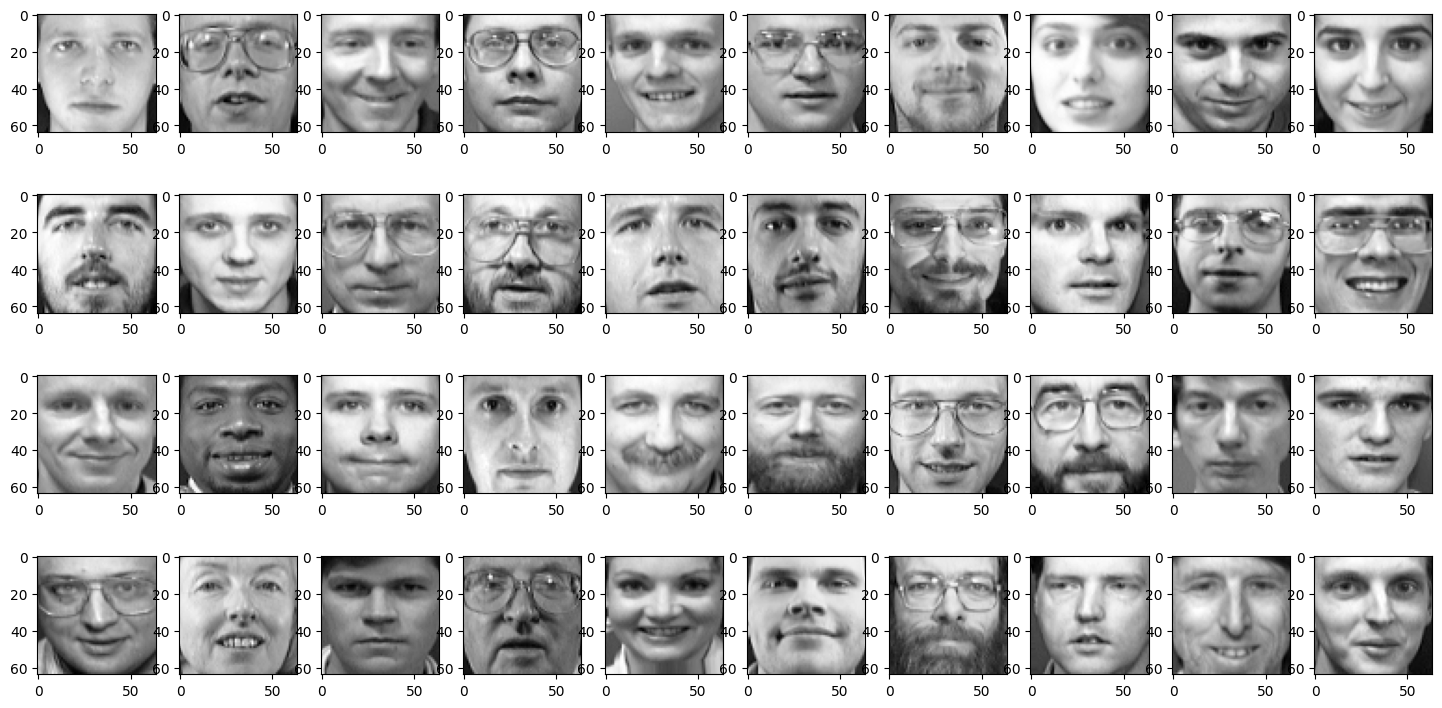

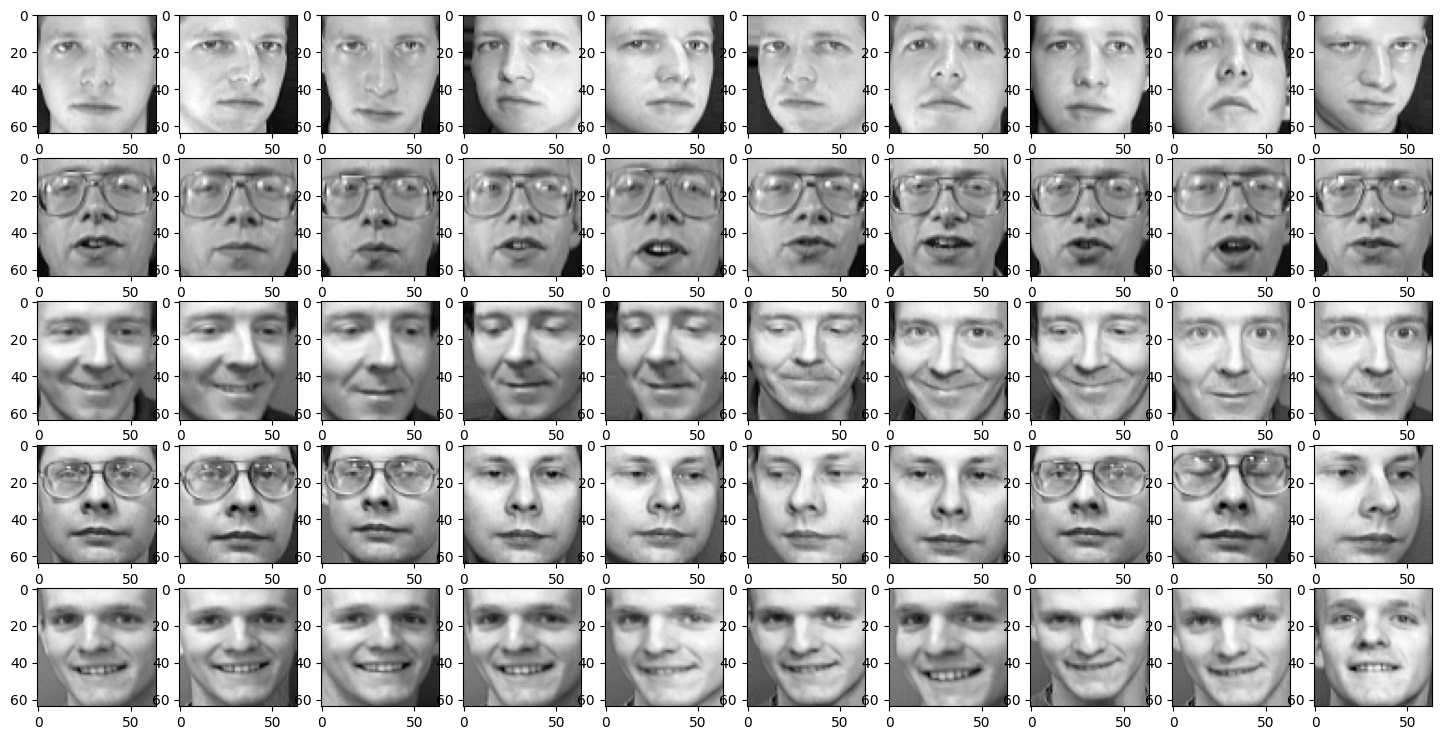

(400, 40)
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_131 (Conv2D)         (None, 64, 64, 8)         208       
                                                                 
 max_pooling2d_131 (MaxPool  (None, 32, 32, 8)         0         
 ing2D)                                                          
                                                                 
 conv2d_132 (Conv2D)         (None, 32, 32, 16)        3216      
                                                                 
 max_pooling2d_132 (MaxPool  (None, 16, 16, 16)        0         
 ing2D)                                                          
                                                                 
 conv2d_133 (Conv2D)         (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_133 (MaxPool  (None, 8, 8, 3

In [83]:
# Standard scientific Python imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
#Load data, face images and their target i.e. perosn number
data = np.load("/kaggle/input/anndataset/olivetti_faces.npy")
target = np.load("/kaggle/input/anndataset/olivetti_faces_target.npy")

#print the size of data and target
#Data has 400 images of size 64 x 64 pixels (grayscale)
#Target has information about class of all 400 images
print(data.shape)
print(target.shape)

#Identity number of unique persons (ids) in the trarget data
#For ORL / Olivetti face dataset this there are 40 people
#The dataset contains 10 images of each person. Therefore 40 x 10 = 400 images
unique_ids=np.unique(target)
print(len(unique_ids))

#Display one sample image for each person
#Display the 40 images in 4 rows with each row having 10 images
fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
axarr = axarr.flatten()
imgs=data
for id in unique_ids:
    img_id = id * 10
    axarr[id].imshow(imgs[img_id], cmap='gray')

#Display all 10 images of first 5 people
cols = 10
subject_ids=[0, 1, 2, 3, 4]
rows = (len(subject_ids)*10)//cols
fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 9))
for i, subject_ids in enumerate(subject_ids):
    for j in range(cols):
        img_id = subject_ids*10 + j
        axarr[i, j].imshow(imgs[img_id], cmap='gray')

plt.show()


#Split the data into test and train data. Select test size = 20%
#Use sklearn library to split data into trianing and testing set
#X_train contains the image information and Y_train contains the target label (class)
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.2, random_state= 0)

#For training the data has to be split into training and validation, Split training data into training and validation set
#Set validation data size = 20% of training data
#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)

#Import keras for building the Convolutional Neural Network
#from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten



#Split the data into test and train data. Select test size = 20%
#target = np_utils.to_categorical(target, len(np.unique(target)))
target = to_categorical(target, len(np.unique(target)))

#Use sklearn library to split data into trianing and testing set
#X_train contains the image information and Y_train contains the target label (class)
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.2, random_state= 0)

#For training the data has to be split into training and validation, Split training data into training and validation set
#Set validation data size = 20% of training data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)

#target.shape
print(target.shape)
#Remember the third dimension is important for keras so specify that third dimension is 1
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)


#Define the architecture of the convolutional neural network

model = Sequential()

#Add a conv layer having 8 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(8, (5, 5), activation='relu', input_shape=(64, 64, 1), padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 16 x 16)
model.add(MaxPooling2D(pool_size=(2,2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 4 x 4)
model.add(MaxPooling2D(pool_size=(2,2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 2 x 2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
#Pass data through a softmax layer
model.add(Dense(40, activation='softmax'))
#Since there are more than 2 classes use categorical_crossentropy, adam optimization and optimize based upon accuracy value
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Print a summary of the model
model.summary()

#Train the network using the above deinfed network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)

train_accuracy = H.history['accuracy'][9]
val_accuracy = H.history['val_accuracy'][9]

print("Training Accuracy:",train_accuracy)
print("Validation Accuracy:",val_accuracy)



The pool size of the max pooling layers is (4, 4), which decreases the picture size by a factor of 4 in both dimensions. This downsampling may result in the loss of fine-grained information, which may impair the network's capacity to categorize pictures effectively, particularly in the validation set.

The downsampling value reduces as the pooling layer size(2,2) decreases, allowing the network to retain more spatial information. This may aid in the preservation of finer features and increase validation accuracy.also,Making the image more understandable to the machine and aiding the detection of key characteristics.



*   When the pool size is 4, the validation accuracy is 0.00%.
*   When the poll max is set at 2, the validation accuracy is 60%











# Question 5: Dr. Hinton, has highlighted that aggressively using pooling layers may result in loss of important information. Is there a way that the CNN architecture starts producing better training and validation accuracy?

To enhance training and validation accuracy without heavily relying on pooling layers,we would consider the following approaches:
*  Reduce the stride of convolutional layers.
*   Optimal for smaller pooling sizes, such as (2,2) instead of (4,4).
*   Augment the number of filters in convolutional layers to capture a greater variety of features.
*   Incorporate dropout layers to mitigate overfitting.
*   Explore diverse activation functions, such as ReLU or Leaky ReLU.

# Question 6: Make changes to the convolutional neural network to get the best validation accuracy. You are not allowed to change the number of epochs or batch size for this task.


In this code, we made the following modifications to optimize the CNN:

*    Adjust Pooling Layer Sizes: Alter the pool sizes from (4, 4) to (2, 2) to retain more image details.
*    Integrate Dropout Layers: Incorporate dropout layers to mitigate overfitting, particularly following dense or convolutional layers.
*    Raise Filter Count: Enhance the number of filters in the convolutional layers to capture more intricate features.
*    Modify Activation Functions: Explore different activation functions, such as using ReLU for the convolutional layers.
*    Change Convolutional Layer Parameters: Experiment with diverse kernel sizes and potentially modify strides.


In [57]:
# Standard scientific Python imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

# Load data, face images and their target i.e. person number
data = np.load("/kaggle/input/anndataset/olivetti_faces.npy")
target = np.load("/kaggle/input/anndataset/olivetti_faces_target.npy")

# Split the data into test and train data. Select test size = 20%
target = to_categorical(target, len(np.unique(target)))
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

# Remember the third dimension is important for Keras, so specify that the third dimension is 1
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

# Define the architecture of the convolutional neural network
model = Sequential()

model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(64, 64, 1), padding='same'))  # Change kernel size and activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Change pool size
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))  # Change kernel size and activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Change pool size
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))  # Change kernel size and activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Change pool size
model.add(Flatten())
model.add(Dense(256, activation='relu'))  # Add dropout after this dense layer
model.add(Dropout(0.25))
model.add(Dense(40, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model
model.summary()

# Train the network using the above-defined network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)
train_accuracy = H.history['accuracy'][9]
val_accuracy = H.history['val_accuracy'][9]

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 64, 64, 8)         80        
                                                                 
 max_pooling2d_86 (MaxPooli  (None, 32, 32, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_87 (Conv2D)          (None, 32, 32, 16)        1168      
                                                                 
 max_pooling2d_87 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_88 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_88 (MaxPooli  (None, 8, 8, 32)        

# Question 7: Plot the difference between training and validation accuracy for each epoch.

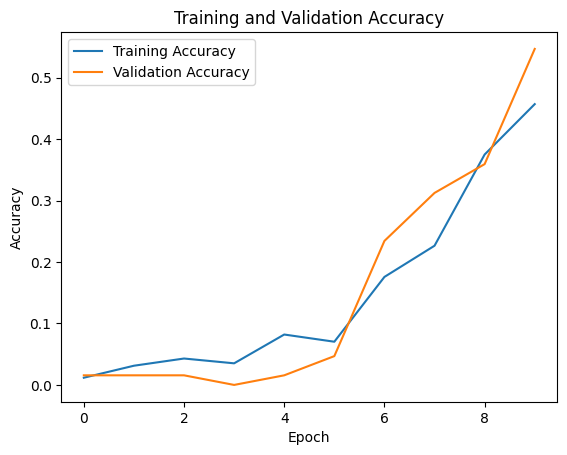

In [56]:
# Plot the difference between training and validation accuracy for each epoch
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Question 8: For the best network architecture change the batch size to 16 and plot the training vs validation accuracy graph. What happened to the validation accuracy after last epoch as compared to when the batch size was 32.

In [39]:
# Standard scientific Python imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

# Load data, face images and their target i.e. person number
data = np.load("/kaggle/input/anndataset/olivetti_faces.npy")
target = np.load("/kaggle/input/anndataset/olivetti_faces_target.npy")

# Split the data into test and train data. Select test size = 20%
target = to_categorical(target, len(np.unique(target)))
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

# Remember the third dimension is important for Keras, so specify that the third dimension is 1
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

# Define the architecture of the convolutional neural network
model = Sequential()

model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(64, 64, 1), padding='same'))  # Change kernel size and activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Change pool size
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))  # Change kernel size and activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Change pool size
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))  # Change kernel size and activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Change pool size
model.add(Flatten())
model.add(Dense(256, activation='relu'))  # Add dropout after this dense layer
model.add(Dropout(0.25))
model.add(Dense(40, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model
model.summary()

# Train the network using the above-defined network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=16, epochs=10, verbose=1)
train_accuracy = H.history['accuracy'][9]
val_accuracy = H.history['val_accuracy'][9]

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 64, 64, 8)         80        
                                                                 
 max_pooling2d_59 (MaxPooli  (None, 32, 32, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_60 (Conv2D)          (None, 32, 32, 16)        1168      
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_61 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 8, 8, 32)        

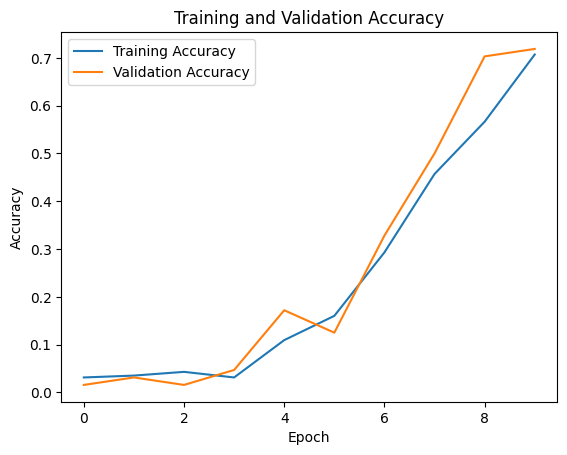

In [40]:
# Plot the difference between training and validation accuracy for each epoch
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

By reducing the batch size, the model has the potential to converge more quickly and exhibit enhanced generalization capabilities. Consequently, the validation accuracy is likely to improve compared to when the batch size was set to 32. With a smaller batch size, the model can update its weights more frequently during training, increasing the likelihood of finding an improved optimal solution within the parameter space.

finally, Validation Accuracy in last epoch:  71%  when batch size is 16 . However,Validation Accuracy in last epoch: 48% when batch size, is 32

# Question 9: For the best network architecture change the number of epochs to 5 and 20 and share the final validation accuracy for 5, 10 and 20 epochs. What do the results highlight?

# epochs 5

In [76]:
# Standard scientific Python imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

# Load data, face images and their target i.e. person number
data = np.load("/kaggle/input/anndataset/olivetti_faces.npy")
target = np.load("/kaggle/input/anndataset/olivetti_faces_target.npy")

# Split the data into test and train data. Select test size = 20%
target = to_categorical(target, len(np.unique(target)))
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

# Remember the third dimension is important for Keras, so specify that the third dimension is 1
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

# Define the architecture of the convolutional neural network
model = Sequential()

model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(64, 64, 1), padding='same'))  # Change kernel size and activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Change pool size
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))  # Change kernel size and activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Change pool size
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))  # Change kernel size and activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Change pool size
model.add(Flatten())
model.add(Dense(256, activation='relu'))  # Add dropout after this dense layer
model.add(Dropout(0.25))
model.add(Dense(40, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model
model.summary()

# Train the network using the above-defined network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=16, epochs=5, verbose=1)
train_accuracy = H.history['accuracy'][4]
val_accuracy = H.history['val_accuracy'][4]

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_119 (Conv2D)         (None, 64, 64, 8)         80        
                                                                 
 max_pooling2d_119 (MaxPool  (None, 32, 32, 8)         0         
 ing2D)                                                          
                                                                 
 conv2d_120 (Conv2D)         (None, 32, 32, 16)        1168      
                                                                 
 max_pooling2d_120 (MaxPool  (None, 16, 16, 16)        0         
 ing2D)                                                          
                                                                 
 conv2d_121 (Conv2D)         (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_121 (MaxPool  (None, 8, 8, 32)        

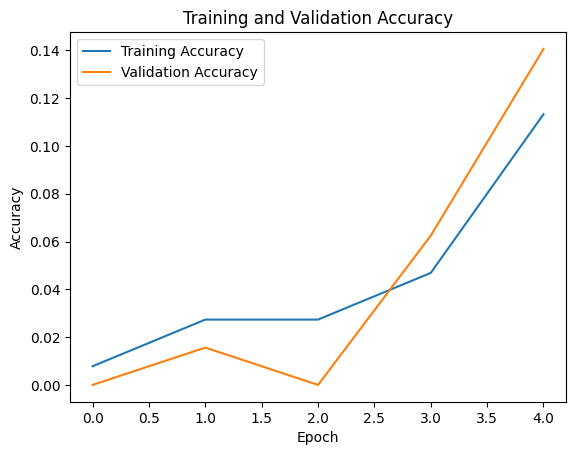

In [77]:
# Plot the difference between training and validation accuracy for each epoch
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# epochs 10

In [69]:
# Standard scientific Python imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

# Load data, face images and their target i.e. person number
data = np.load("/kaggle/input/anndataset/olivetti_faces.npy")
target = np.load("/kaggle/input/anndataset/olivetti_faces_target.npy")

# Split the data into test and train data. Select test size = 20%
target = to_categorical(target, len(np.unique(target)))
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

# Remember the third dimension is important for Keras, so specify that the third dimension is 1
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

# Define the architecture of the convolutional neural network
model = Sequential()

model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(64, 64, 1), padding='same'))  # Change kernel size and activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Change pool size
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))  # Change kernel size and activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Change pool size
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))  # Change kernel size and activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Change pool size
model.add(Flatten())
model.add(Dense(256, activation='relu'))  # Add dropout after this dense layer
model.add(Dropout(0.25))
model.add(Dense(40, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model
model.summary()

# Train the network using the above-defined network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=16, epochs=10, verbose=1)
train_accuracy = H.history['accuracy'][9]
val_accuracy = H.history['val_accuracy'][9]

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_107 (Conv2D)         (None, 64, 64, 8)         80        
                                                                 
 max_pooling2d_107 (MaxPool  (None, 32, 32, 8)         0         
 ing2D)                                                          
                                                                 
 conv2d_108 (Conv2D)         (None, 32, 32, 16)        1168      
                                                                 
 max_pooling2d_108 (MaxPool  (None, 16, 16, 16)        0         
 ing2D)                                                          
                                                                 
 conv2d_109 (Conv2D)         (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_109 (MaxPool  (None, 8, 8, 32)        

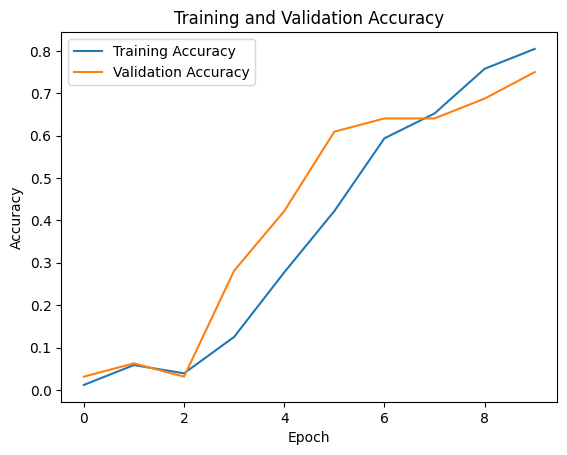

In [70]:
# Plot the difference between training and validation accuracy for each epoch
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# epochs 20

In [78]:
# Standard scientific Python imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

# Load data, face images and their target i.e. person number
data = np.load("/kaggle/input/anndataset/olivetti_faces.npy")
target = np.load("/kaggle/input/anndataset/olivetti_faces_target.npy")

# Split the data into test and train data. Select test size = 20%
target = to_categorical(target, len(np.unique(target)))
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

# Remember the third dimension is important for Keras, so specify that the third dimension is 1
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

# Define the architecture of the convolutional neural network
model = Sequential()

model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(64, 64, 1), padding='same'))  # Change kernel size and activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Change pool size
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))  # Change kernel size and activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Change pool size
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))  # Change kernel size and activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Change pool size
model.add(Flatten())
model.add(Dense(256, activation='relu'))  # Add dropout after this dense layer
model.add(Dropout(0.25))
model.add(Dense(40, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model
model.summary()

# Train the network using the above-defined network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=16, epochs=20, verbose=1)
train_accuracy = H.history['accuracy'][9]
val_accuracy = H.history['val_accuracy'][9]

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_122 (Conv2D)         (None, 64, 64, 8)         80        
                                                                 
 max_pooling2d_122 (MaxPool  (None, 32, 32, 8)         0         
 ing2D)                                                          
                                                                 
 conv2d_123 (Conv2D)         (None, 32, 32, 16)        1168      
                                                                 
 max_pooling2d_123 (MaxPool  (None, 16, 16, 16)        0         
 ing2D)                                                          
                                                                 
 conv2d_124 (Conv2D)         (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_124 (MaxPool  (None, 8, 8, 32)        

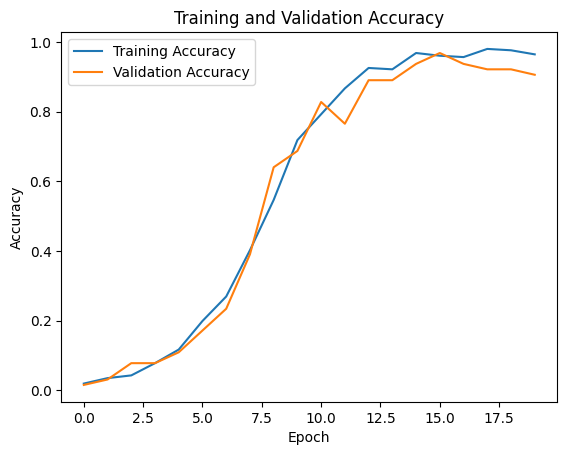

In [79]:
# Plot the difference between training and validation accuracy for each epoch
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Question 10: For the best network architecture and batch size =16 and epochs =10, change the test data size to 40% and share what is the effect on validation accuracy of the algorithm?

In [80]:
# Standard scientific Python imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

# Load data, face images and their target i.e. person number
data = np.load("/kaggle/input/anndataset/olivetti_faces.npy")
target = np.load("/kaggle/input/anndataset/olivetti_faces_target.npy")

# Split the data into train, validation, and test data. Select test size = 40%
target = to_categorical(target, len(np.unique(target)))
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.4, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

# Remember the third dimension is important for Keras, so specify that the third dimension is 1
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

# Define the architecture of the convolutional neural network
model = Sequential()

model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(64, 64, 1), padding='same'))  # Change kernel size and activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Change pool size
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))  # Change kernel size and activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Change pool size
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))  # Change kernel size and activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Change pool size
model.add(Flatten())
model.add(Dense(256, activation='relu'))  # Add dropout after this dense layer
model.add(Dropout(0.25))
model.add(Dense(40, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model
model.summary()

# Train the network using the above-defined network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=16, epochs=10, verbose=1)
train_accuracy = H.history['accuracy'][9]
val_accuracy = H.history['val_accuracy'][9]

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_125 (Conv2D)         (None, 64, 64, 8)         80        
                                                                 
 max_pooling2d_125 (MaxPool  (None, 32, 32, 8)         0         
 ing2D)                                                          
                                                                 
 conv2d_126 (Conv2D)         (None, 32, 32, 16)        1168      
                                                                 
 max_pooling2d_126 (MaxPool  (None, 16, 16, 16)        0         
 ing2D)                                                          
                                                                 
 conv2d_127 (Conv2D)         (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_127 (MaxPool  (None, 8, 8, 32)        

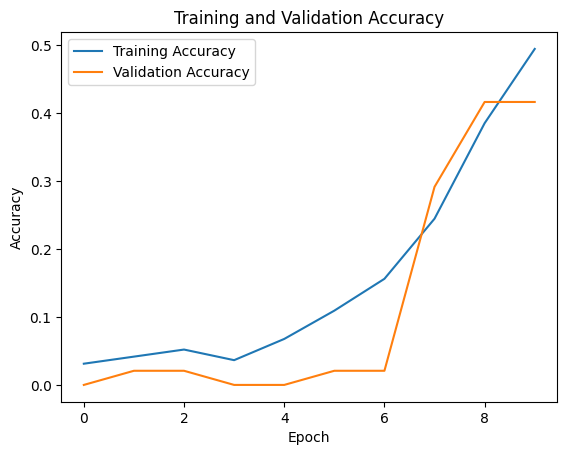

In [81]:
# Plot the difference between training and validation accuracy for each epoch
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Expanding the test dataset to 40% will shrink the training dataset, causing the model to learn from a smaller portion of the data. Consequently, this will lead to decreased accuracy in both the training and validation sets.